# MNIST CNN - Assignment 5

### Imports

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from IPython.display import display
params = {'legend.fontsize': 16,
          'legend.handlelength': 2,
          'figure.figsize': (14,12),
          'axes.titlesize': 16,
          'axes.labelsize': 16
         }
plt.rcParams.update(params)

In [19]:
# Keras models and layers
import h5py
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

### Global Vars

In [20]:
batch_size = 128
num_classes = 10
epochs = 1

### Import Dataset and One-Hotize the output

Notice that the images are reshaped to add a single channel (line 9 & 10)

In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('x_train shape (after adding channels):', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 18s 2us/step
('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('x_train shape (after adding channels):', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


# CNN Model1

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=input_shape, name="Input_Conv2D_1"))
model1.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu', name='Conv2D_2'))
model1.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'))
model1.add(Dropout(0.25, name='Dropout_2'))
model1.add(Flatten(name='Flatten'))
model1.add(Dense(128, activation='relu', name='Dense_3'))
model1.add(Dropout(0.5, name='Dropout_3'))
model1.add(Dense(num_classes, activation='softmax', name='Softmax_Output'))
model1.summary()

In [6]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,
           validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 144s 3ms/step - loss: 0.2511 - acc: 0.9244 - val_loss: 0.0539 - val_acc: 0.9850


In [7]:
score1 = model1.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score1[1])

10000/10000 [==============================] - 7s 708us/step
()
('Test accuracy: ', 0.9808)


In [8]:
model1.save("mnist_cnn.h5", overwrite=True)

# CNN Model2 with Batch Normalization

In [9]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), input_shape=input_shape, name='Input_Conv2D_1', activation='relu'))
model2.add(BatchNormalization(axis=-1, name='BatchNorm_1'))

model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu', name='Conv2D_2'))
model2.add(BatchNormalization(axis=-1, name='BatchNorm_2'))
model2.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'))
model2.add(Dropout(0.25, name='Dropout_2'))

model2.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), name='Conv2D_3', activation='relu'))
model2.add(BatchNormalization(axis=-1, name='BatchNorm_3'))
model2.add(MaxPooling2D(pool_size=(2,2), name='MaxPool_3'))

model2.add(Flatten(name='Flatten')) # Fully connected layer
model2.add(BatchNormalization(name='BatchNorm_Flatten'))

model2.add(Dense(128, name='Dense_5', activation='relu'))
model2.add(BatchNormalization(name='BatchNorm_5'))
model2.add(Dropout(0.5, name='Dropout_5'))

model2.add(Dense(num_classes, activation='softmax', name='SoftMax_Output'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Conv2D_1 (Conv2D)      (None, 26, 26, 32)        320       
_________________________________________________________________
BatchNorm_1 (BatchNormalizat (None, 26, 26, 32)        128       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
BatchNorm_2 (BatchNormalizat (None, 24, 24, 64)        256       
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 10, 10, 64)        36928     
__________

In [10]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,
           validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 401s 7ms/step - loss: 0.1784 - acc: 0.9463 - val_loss: 0.0484 - val_acc: 0.9858


In [11]:
score2 = model2.evaluate(x_test, y_test)
print()
print('Test accuracy: ', score2[1])

10000/10000 [==============================] - 25s 2ms/step
()
('Test accuracy: ', 0.9849)


In [12]:
model2.save("mnist_cnn_batchnorm.h5", overwrite=True)

# Loading Saved Models

In [11]:
from keras.models import load_model
import keras.backend as K

In [14]:
loaded_model = load_model("mnist_cnn_batchnorm.h5")

# Visualize Weights

In [15]:
for l in loaded_model.layers:
    if l.name == 'Input_Conv2D_1':
        weights, biases = l.get_weights()
        print weights.shape, biases.shape
        activations = l.output
        print activations

(3, 3, 1, 32) (32,)
Tensor("Input_Conv2D_1_2/Relu:0", shape=(?, 26, 26, 32), dtype=float32)


### Plot histogram of all the weights from first convolutional layer named `Input_Conv2D_1`

(array([25., 28., 32., 29., 30., 37., 30., 29., 34., 14.]),
 array([-0.14874816, -0.11770948, -0.0866708 , -0.05563212, -0.02459344,
         0.00644524,  0.03748392,  0.06852259,  0.09956127,  0.13059995,
         0.16163863]),
 <a list of 10 Patch objects>)

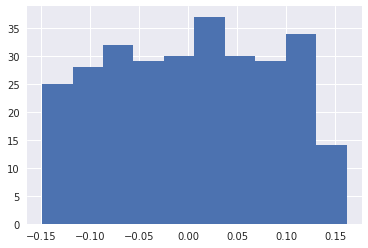

In [16]:
plt.hist(weights.reshape(288))

### Visualize the weights of `15th` kernel from layer `Input_Conv2D_1`

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


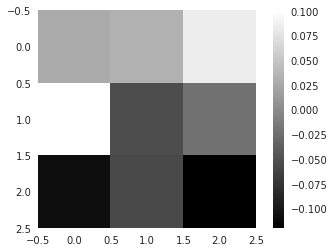

In [17]:
plt.imshow(weights[:,:,:,15].reshape(3,3), cmap='gray')
plt.grid('off')
plt.colorbar()

### Visualize all kernels from layer `Input_Conv2D_1`

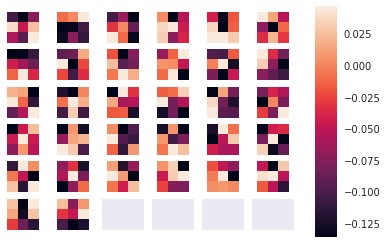

In [18]:
fig, axes = plt.subplots(nrows=6, ncols=6)
for i, ax in enumerate(axes.flat):
    if i < weights.shape[3]:
        im = ax.imshow(weights[:,:,:,i].reshape(weights.shape[0], weights.shape[1]))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.grid(False)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)

# Visualize Activations

`get_layer_output` function takes in the inputs from `layer 0` and outputs activation from `layer 2`

In [19]:
get_layer_output = K.function([loaded_model.layers[0].input], [loaded_model.layers[7].output])

sample number `13` which happens to be a `zero` is provided for activation

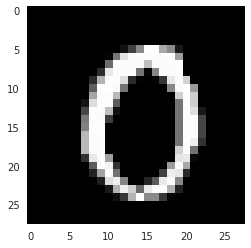

In [20]:
sample_num = 13
activations = get_layer_output([[x_test[sample_num]]])[0]
plt.grid('off')
plt.imshow(x_test[sample_num].reshape(28,28), cmap='gray')

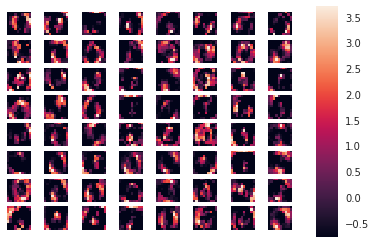

In [21]:
fig, axes = plt.subplots(nrows=8, ncols=8)
for i, ax in enumerate(axes.flat):
    if i < activations.shape[3]:
        im = ax.imshow(activations[:,:,:,i].reshape(activations.shape[1], activations.shape[2]))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.grid(False)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)

---
# Assignment 5

1. Retrain the models for longer epochs and test if the accuracy gets better.
2. Generate statistics/ROC curves for the predictions using batch normalized model.
3. Import pretrained models using the following code. In the below snippet I am using VGG16. Note that if you initialize with `weights=None` the weights will be assigned to random. Use this model to visualize weights and activations as above. HINT: to visualize activations you need to provide a 3 channel image (use google), the image size can be determined from the model. You will also have to crop/rotate etc. MNIST data won't work here.
```
from keras.applications import mobilenet
#Load the model, defaults to pretrained weights from Imagenet
mobile_model = mobilenet.MobileNet()
# Print summary
mobile_model.summary()
```

# Problem 1)

In [39]:
batch_size = 128
num_classes = 10
epochs = 4

In [40]:
def importData(): 
    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print("X_train original shape", x_train.shape)
    print("y_train original shape", y_train.shape)

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    x_train /= 255
    x_test /= 255

    print('x_train shape (after adding channels):', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    return x_train, y_train, x_test, y_test

In [41]:
x_train1, y_train1, x_test1, y_test1 = importData()

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('x_train shape (after adding channels):', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [42]:
model1_1 = Sequential()
model1_1.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), activation='relu', input_shape=input_shape, name="Input_Conv2D_1"))
model1_1.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu', name='Conv2D_2'))
model1_1.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'))
model1_1.add(Dropout(0.25, name='Dropout_2'))
model1_1.add(Flatten(name='Flatten'))
model1_1.add(Dense(128, activation='relu', name='Dense_3'))
model1_1.add(Dropout(0.5, name='Dropout_3'))
model1_1.add(Dense(num_classes, activation='softmax', name='Softmax_Output'))
model1_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Conv2D_1 (Conv2D)      (None, 26, 26, 32)        320       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
Dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
Dropout_3 (Dropout)          (None, 128)               0         
__________

In [43]:
model1_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1_1.fit(x_train1, y_train1,batch_size=batch_size, epochs=epochs,
           validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/4
54000/54000 [==============================] - 150s 3ms/step - loss: 0.2704 - acc: 0.9180 - val_loss: 0.0637 - val_acc: 0.9825
Epoch 2/4
54000/54000 [==============================] - 137s 3ms/step - loss: 0.0928 - acc: 0.9729 - val_loss: 0.0409 - val_acc: 0.9887
Epoch 3/4
54000/54000 [==============================] - 138s 3ms/step - loss: 0.0688 - acc: 0.9792 - val_loss: 0.0379 - val_acc: 0.9892
Epoch 4/4
54000/54000 [==============================] - 138s 3ms/step - loss: 0.0568 - acc: 0.9829 - val_loss: 0.0353 - val_acc: 0.9905


In [44]:
score1 = model1_1.evaluate(x_test1, y_test1)
print()
print('Test accuracy: ', score1[1])

10000/10000 [==============================] - 7s 728us/step
()
('Test accuracy: ', 0.9898)


In [45]:
x_train1, y_train1, x_test1, y_test1 = importData()

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('x_train shape (after adding channels):', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')


In [46]:
model2_2 = Sequential()

model2_2.add(Conv2D(32, kernel_size=(3, 3), strides=(1,1), input_shape=input_shape, name='Input_Conv2D_1', activation='relu'))
model2_2.add(BatchNormalization(axis=-1, name='BatchNorm_1'))

model2_2.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), activation='relu', name='Conv2D_2'))
model2_2.add(BatchNormalization(axis=-1, name='BatchNorm_2'))
model2_2.add(MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'))
model2_2.add(Dropout(0.25, name='Dropout_2'))

model2_2.add(Conv2D(64, kernel_size=(3, 3), strides=(1,1), name='Conv2D_3', activation='relu'))
model2_2.add(BatchNormalization(axis=-1, name='BatchNorm_3'))
model2_2.add(MaxPooling2D(pool_size=(2,2), name='MaxPool_3'))

model2_2.add(Flatten(name='Flatten')) # Fully connected layer
model2_2.add(BatchNormalization(name='BatchNorm_Flatten'))

model2_2.add(Dense(128, name='Dense_5', activation='relu'))
model2_2.add(BatchNormalization(name='BatchNorm_5'))
model2_2.add(Dropout(0.5, name='Dropout_5'))

model2_2.add(Dense(num_classes, activation='softmax', name='SoftMax_Output'))
model2_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Conv2D_1 (Conv2D)      (None, 26, 26, 32)        320       
_________________________________________________________________
BatchNorm_1 (BatchNormalizat (None, 26, 26, 32)        128       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
BatchNorm_2 (BatchNormalizat (None, 24, 24, 64)        256       
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 12, 12, 64)        0         
_________________________________________________________________
Dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 10, 10, 64)        36928     
__________

In [47]:
model2_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2_2.fit(x_train1, y_train1,batch_size=batch_size, epochs=epochs,
           validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/4
54000/54000 [==============================] - 379s 7ms/step - loss: 0.1841 - acc: 0.9442 - val_loss: 0.0444 - val_acc: 0.9860
Epoch 2/4
54000/54000 [==============================] - 401s 7ms/step - loss: 0.0651 - acc: 0.9806 - val_loss: 0.0312 - val_acc: 0.9917
Epoch 3/4
54000/54000 [==============================] - 364s 7ms/step - loss: 0.0489 - acc: 0.9850 - val_loss: 0.0347 - val_acc: 0.9895
Epoch 4/4
54000/54000 [==============================] - 362s 7ms/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0340 - val_acc: 0.9895


In [49]:
score2_2 = model2_2.evaluate(x_test1, y_test1)
print()
print('Test accuracy: ', score1[1])

10000/10000 [==============================] - 29s 3ms/step
()
('Test accuracy: ', 0.9898)


The test accuracy did improve in both models. Though the benefits for the batch normalization model were smaller. This is probably because it already learnt the model pretty well and it did not gain much from additional back and forward passes.

# Problem 2.)

In [52]:
y_pred = model2_2.predict(x_test)

In [54]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
stats_list = []
for i in range(10):
    # Calculate ROC Curve
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    # Calculate area under the curve
    roc_auc = [auc(fpr, tpr)] * len(fpr)
    classes = [i] * len(fpr)
    stats_list += zip(fpr, tpr, roc_auc, classes)
stats = pd.DataFrame(stats_list, columns=['fpr', 'tpr', 'auc', 'class'])
stats.head()

,fpr,tpr,auc,class
0,0.0,0.001020,0.999983,0
1,0.0,0.005102,0.999983,0
2,0.0,0.007143,0.999983,0
3,0.0,0.010204,0.999983,0
4,0.0,0.013265,0.999983,0


In [57]:
import plotly.graph_objs as go
import plotly.offline as py
data = []
for key, grp in stats.groupby(['class']):
    trace = go.Scatter(x = grp.fpr,
                       y = grp.tpr,
                       name = 'class %d' % key)
    data.append(trace)
# Edit the layout
layout = dict(title = 'Receiver Operating Characterstic',
              xaxis = dict(title = 'False Positive Rate',
                           range = [0, 0.2]),
              yaxis = dict(title = 'True Positive Rate'))

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

In [58]:
stats.groupby('class').mean().auc

class
0    0.999983
1    0.999985
2    0.999970
3    0.999967
4    0.999972
5    0.999922
6    0.999913
7    0.999927
8    0.999941
9    0.999921
Name: auc, dtype: float64

Our ROC and AUC have improved signficantly compared to the last assignment. This is probalby due to the pre-processing from the CNN.

# Problem 3.)

Import pretrained models using the following code. In the below snippet I am using VGG16. Note that if you initialize with weights=None the weights will be assigned to random. Use this model to visualize weights and activations as above. HINT: to visualize activations you need to provide a 3 channel image (use google), the image size can be determined from the model. You will also have to crop/rotate etc. MNIST data won't work here.
from keras.applications import mobilenet
#Load the model, defaults to pretrained weights from Imagenet
mobile_model = mobilenet.MobileNet()

mobile_model.summary()

In [6]:
#load pre-trained model mobile.net
from keras.applications import mobilenet
mobile_model = mobilenet.MobileNet(input_tensor = keras.layers.Input(shape=(32, 32, 3)), weights = None, classes=10, pooling = 'max')

mobile_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 34, 34, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 16, 16, 32)        128       
_________________________________________________________________
conv1_relu (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 18, 18, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)        288       
__________

In [7]:
from keras.datasets import cifar10

(x_trainCif, y_trainCif), (x_testCif, y_testCif) = cifar10.load_data()

In [8]:
x_trainCif.shape

(50000, 32, 32, 3)

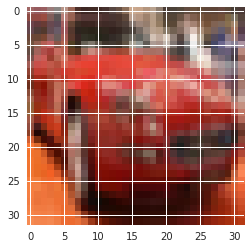

In [9]:
#print out image from dataset
from functools import partial
plot_gray_image = partial(plt.imshow, cmap='gray')
plot_gray_image(x_trainCif[5])

In [10]:
#find max value in dataset for normalization
import numpy as np
np.amax(x_trainCif)

255

In [ ]:
'''
#resize images to 244,244,3
from skimage.transform import resize
def resize_data(data):
    lst = []
    for img in data:
        lst.append(resize(img, (244, 244, 3), mode='reflect'))

    return np.asarray(lst)'''

In [ ]:
#x_trainCif_resi = resize_data(x_trainCif)

In [ ]:
#x_trainCif_resi.shape

In [11]:
#normalize
x_trainCif = x_trainCif.astype('float32')
x_testCif = x_testCif.astype('float32')
x_trainCif/=255
x_testCif/=255

In [12]:
num_classes = 10
# convert class vectors to binary class matrices
y_trainCif = keras.utils.to_categorical(y_trainCif, num_classes)
y_testCif = keras.utils.to_categorical(y_testCif, num_classes)

In [13]:
y_trainCif.shape

(50000, 10)

In [21]:
mobile_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mobile_model.fit(x_trainCif, y_trainCif,batch_size=batch_size, epochs=4,
           validation_split=0.1, verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/4
45000/45000 [==============================] - 692s 15ms/step - loss: 1.2787 - acc: 0.5462 - val_loss: 1.8107 - val_acc: 0.5004
Epoch 2/4
45000/45000 [==============================] - 774s 17ms/step - loss: 1.1396 - acc: 0.5971 - val_loss: 1.4981 - val_acc: 0.5374
Epoch 3/4
45000/45000 [==============================] - 674s 15ms/step - loss: 1.0783 - acc: 0.6169 - val_loss: 1.3760 - val_acc: 0.5678
Epoch 4/4
45000/45000 [==============================] - 690s 15ms/step - loss: 0.9678 - acc: 0.6592 - val_loss: 1.5504 - val_acc: 0.5418


In [22]:
score_mobile = mobile_model.evaluate(x_testCif, y_testCif)
print()
print('Test accuracy: ', score_mobile[1])

10000/10000 [==============================] - 37s 4ms/step
()
('Test accuracy: ', 0.5428)


In [23]:
mobile_model.save("mobile_cnn.h5", overwrite=True)

In [29]:
#load model to visualize weights
from keras.models import load_model
import keras.backend as K
from keras.utils.generic_utils import CustomObjectScope

with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    loaded_model = load_model('mobile_cnn.h5')

In [30]:
for l in loaded_model.layers:
    if l.name == 'conv_preds':
        weights, biases = l.get_weights()
        print weights.shape, biases.shape
        activations = l.output
        print activations

(1, 1, 1024, 10) (10,)
Tensor("conv_preds_2/BiasAdd:0", shape=(?, 1, 1, 10), dtype=float32)


(array([   7.,   28.,   88.,  202.,  656., 1780., 2114., 2433., 2404.,
         528.]),
 array([-0.22629838, -0.19435008, -0.16240178, -0.13045349, -0.09850519,
        -0.0665569 , -0.0346086 , -0.00266031,  0.02928799,  0.06123629,
         0.09318458]),
 <a list of 10 Patch objects>)

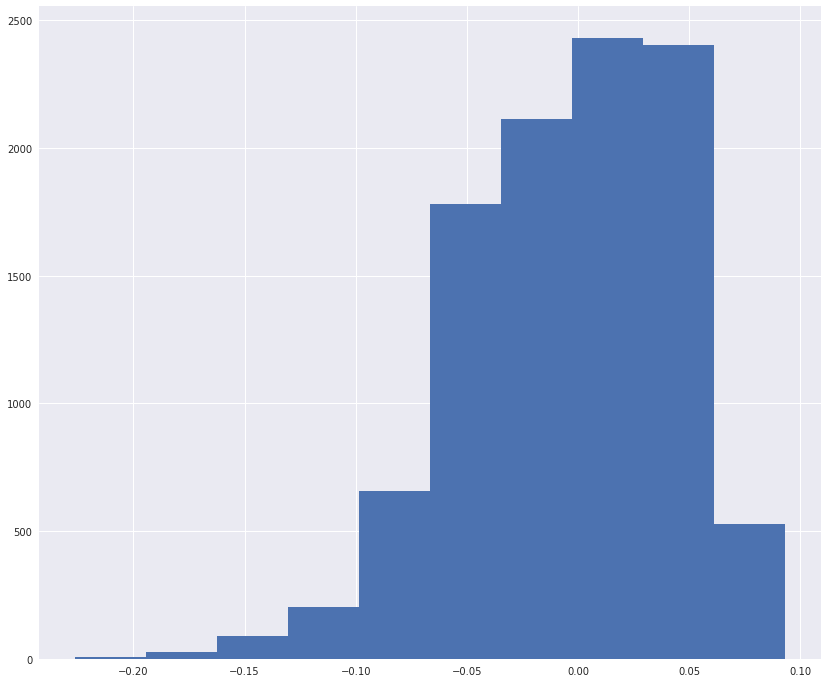

In [32]:
plt.hist(weights.reshape(10240))

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


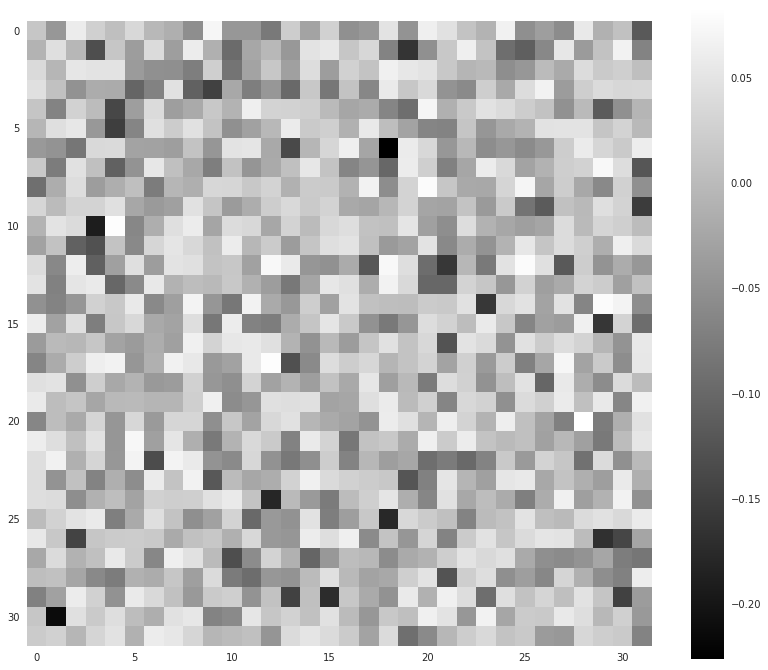

In [41]:
plt.imshow(weights[:,:,:,1].reshape(32,32), cmap='gray')
plt.grid('off')
plt.colorbar()

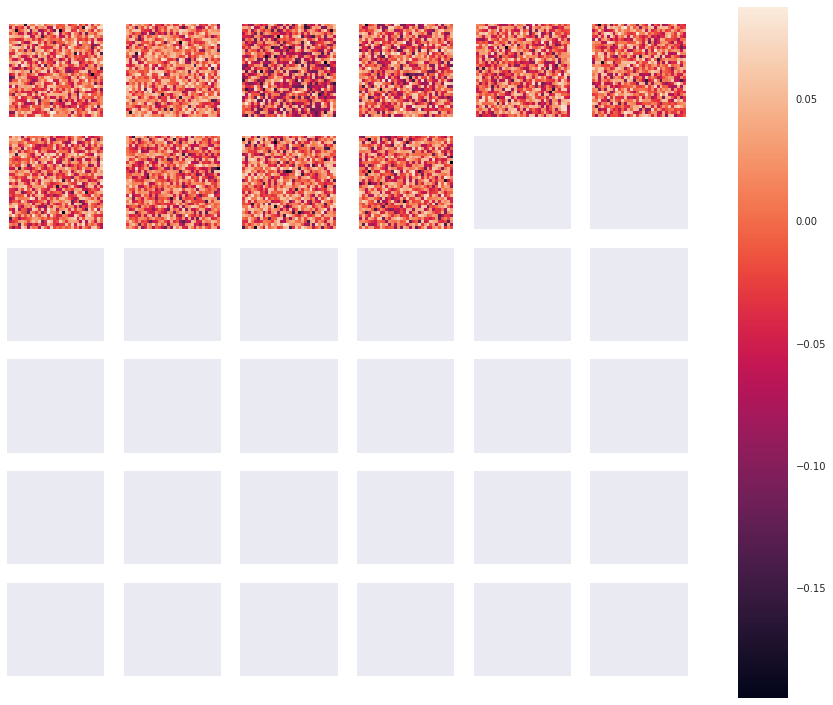

In [43]:
fig, axes = plt.subplots(nrows=6, ncols=6)
for i, ax in enumerate(axes.flat):
    if i < weights.shape[3]:
        im = ax.imshow(weights[:,:,:,i].reshape(32, 32))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.grid(False)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)

In [44]:
get_layer_output = K.function([loaded_model.layers[0].input], [loaded_model.layers[7].output])


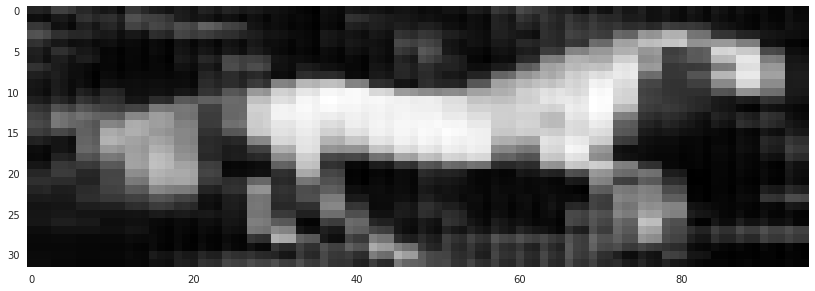

In [53]:
sample_num = 13
activations = get_layer_output([[x_testCif[sample_num]]])[0]
plt.grid('off')
plt.imshow(x_testCif[sample_num].reshape(32,96), cmap='gray')

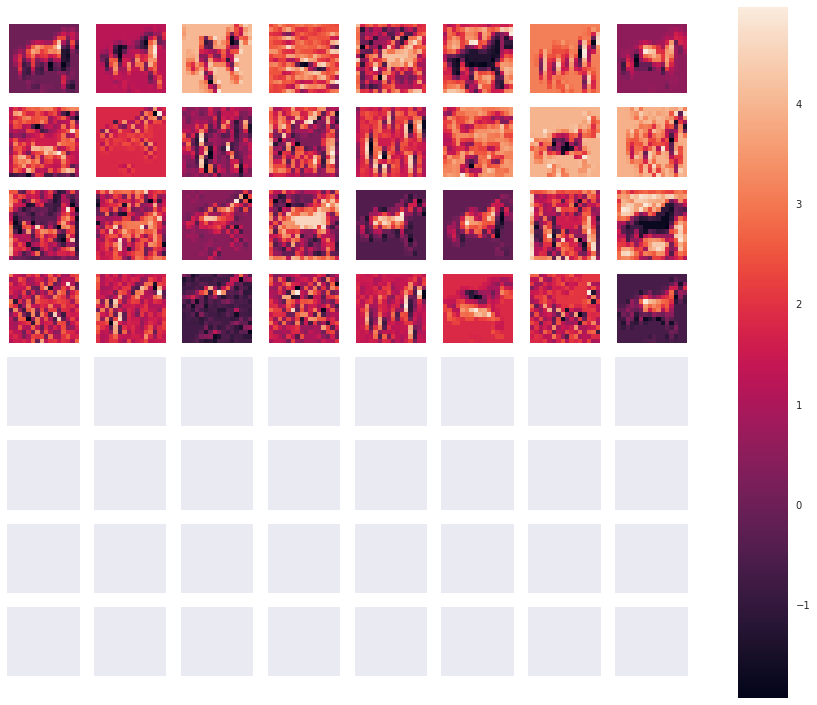

In [54]:
fig, axes = plt.subplots(nrows=8, ncols=8)
for i, ax in enumerate(axes.flat):
    if i < activations.shape[3]:
        im = ax.imshow(activations[:,:,:,i].reshape(activations.shape[1], activations.shape[2]))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.grid(False)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.05, 0.8])
fig.colorbar(im, cax=cbar_ax)